Business Objective:


The goal is to predict whether a patient has heart disease based on the medical attributes in the dataset. This can help healthcare providers identify at-risk patients and administer timely interventions.

Constraints:

Data Quality: The model's accuracy depends on the completeness and quality of the data. Missing values, noise, or outliers could impact predictions.

Interpretability: Medical predictions often need to be explainable for healthcare professionals to trust the model's outputs.

Accuracy: False negatives (predicting no heart disease when there is) could have serious consequences, so minimizing these errors is crucial.

Computational Efficiency: The model should perform efficiently with large-scale medical data, ensuring timely results.

In [2]:
import pandas as pd
df=pd.read_csv('heart disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

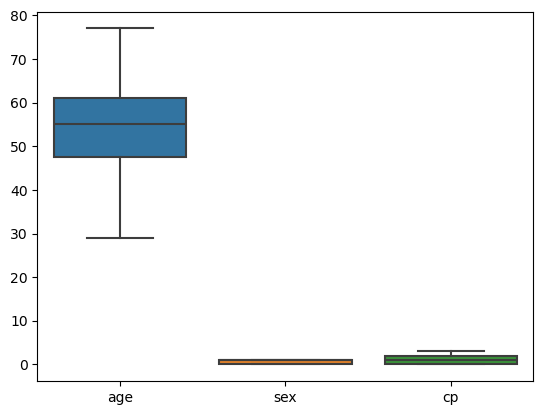

In [22]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['age', 'sex','cp']])

<Axes: >

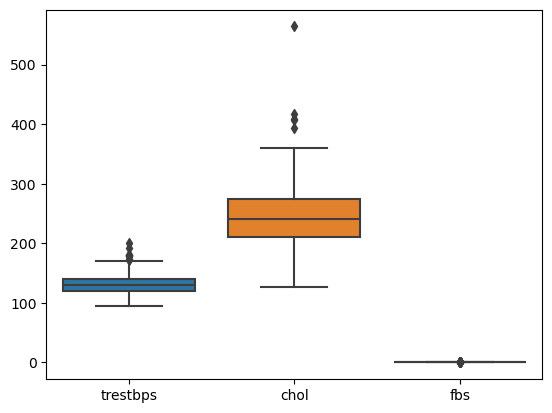

In [10]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['trestbps', 'chol', 'cp']])

<Axes: >

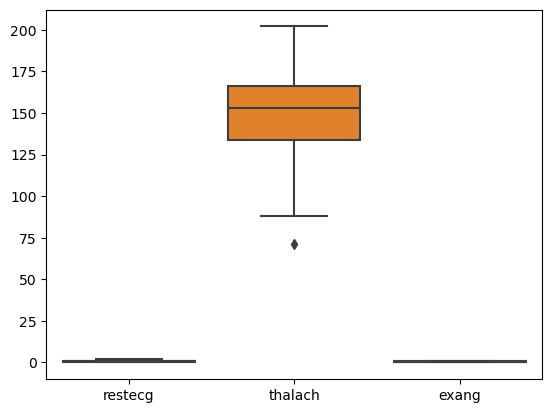

In [26]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['restecg', 'thalach', 'exang']])

<Axes: >

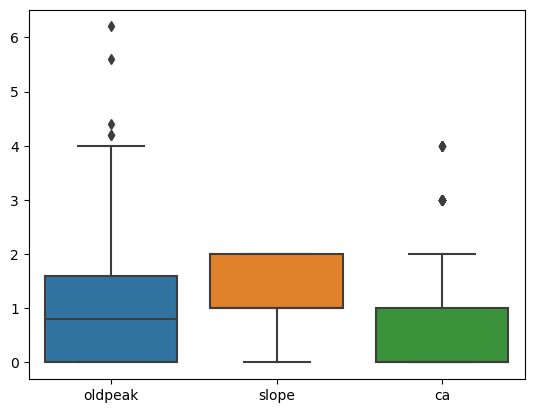

In [28]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['oldpeak', 'slope', 'ca']])

<Axes: >

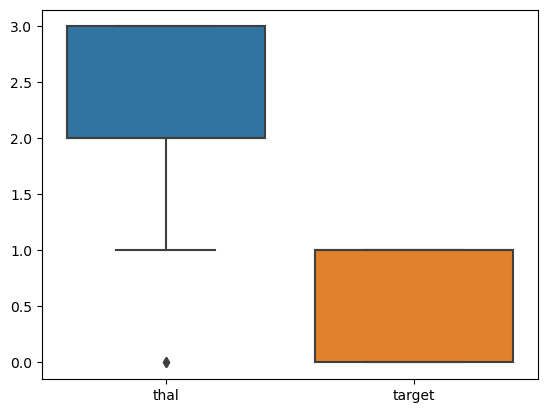

In [30]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['thal','target']])

In [32]:
outliers_columns=['trestbps','chol','fbs','thalach','oldpeak','ca','thal']

In [34]:
import numpy as np
# Apply log transformation to the specified columns
for column in outliers_columns:
    # Adding a small constant to avoid issues with log(0)
    df[column] = np.log1p(df[column])

In [36]:
# Display the transformed data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,4.983607,5.455321,0.693147,0,5.017280,0,1.193922,0,0.0,0.693147,1
1,37,1,2,4.875197,5.525453,0.000000,1,5.236442,0,1.504077,0,0.0,1.098612,1
2,41,0,1,4.875197,5.323010,0.000000,0,5.153292,0,0.875469,2,0.0,1.098612,1
3,56,1,1,4.795791,5.468060,0.000000,1,5.187386,0,0.587787,2,0.0,1.098612,1
4,57,0,0,4.795791,5.872118,0.000000,1,5.099866,1,0.470004,2,0.0,1.098612,1


In [38]:
def remove_out(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df= remove_out(df,outliers_columns)

<Axes: >

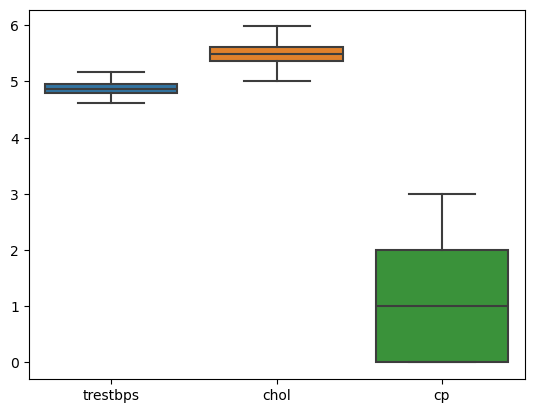

In [40]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['trestbps', 'chol', 'cp']])

In [42]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [44]:
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

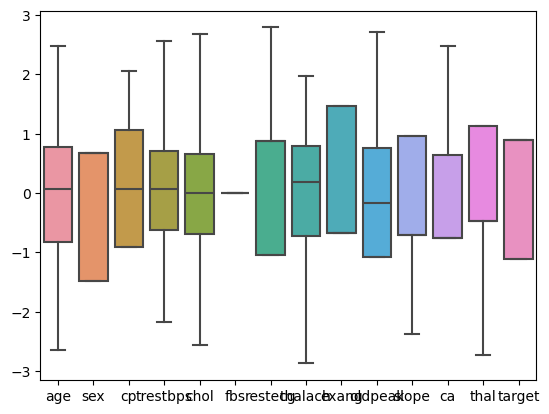

In [46]:
sns.boxplot(df_scaled)


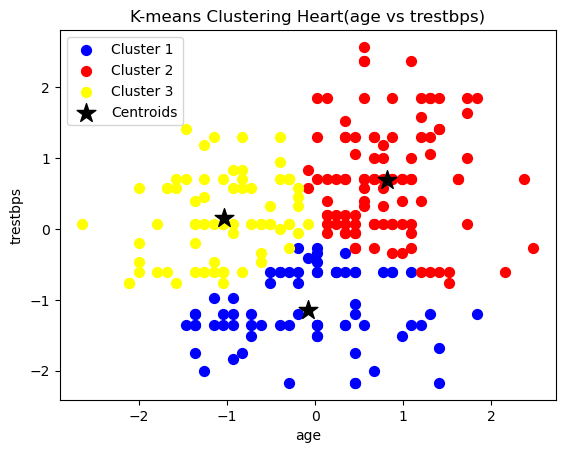

In [54]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['age', 'trestbps']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['age'], df_cluster1['trestbps'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['age'], df_cluster2['trestbps'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['age'], df_cluster3['trestbps'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('K-means Clustering Heart(age vs trestbps)')
plt.legend()
plt.show()

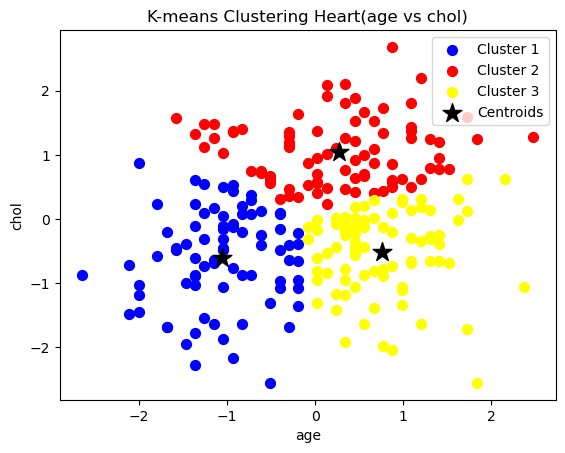

In [56]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['age', 'chol']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['age'], df_cluster1['chol'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['age'], df_cluster2['chol'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['age'], df_cluster3['chol'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('K-means Clustering Heart(age vs chol)')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 3.6184379767129387


In [60]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(df_scaled, y_kmeans)
print(sil_score)

0.05292547728157452


PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Print the explained variance ratio for each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
     

Explained Variance Ratio: [0.2593761  0.11120794 0.09560606]


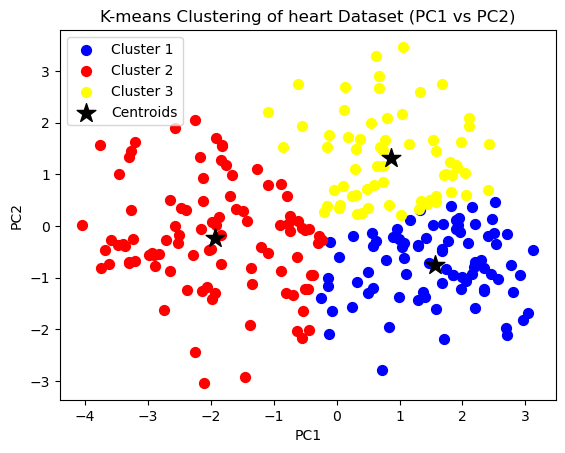

In [65]:
#perform kmeans clustering on PC1 and PC2
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC2']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC2'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC2'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC2'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering of heart Dataset (PC1 vs PC2)')
plt.legend()
plt.show()

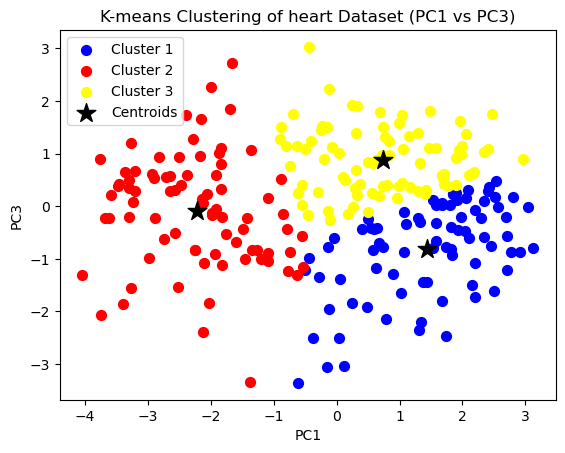

In [67]:
#perform kmeans clustering on PC1 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC3'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC3'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('K-means Clustering of heart Dataset (PC1 vs PC3)')
plt.legend()
plt.show()

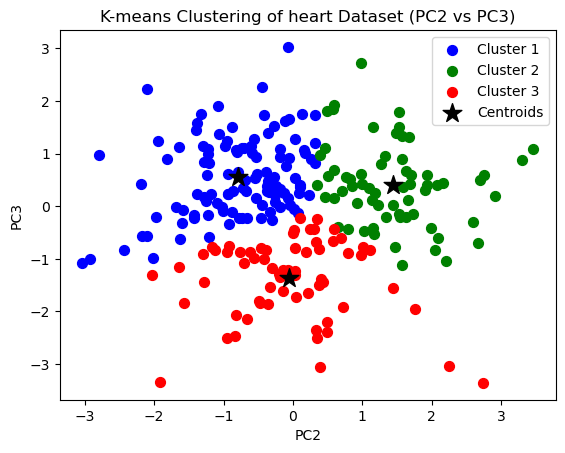

In [69]:
#perform kmeans clustering on PC2 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC2', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC2'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC2'], df_cluster2['PC3'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['PC2'], df_cluster3['PC3'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('K-means Clustering of heart Dataset (PC2 vs PC3)')
plt.legend()
plt.show()

In [71]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(principal_df, y_kmeans)
print(sil_score)

0.16521123392869802


In [73]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 3.1048160728938625
